In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('MUMBAI WEATHER DATASET.csv')

In [ ]:
df.head()

,DATE,TAVG,TMIN,TMAX,PRCP
0,01-01-2020,23.3,15.0,28.6,NaN
1,02-01-2020,23.9,17.2,28.0,NaN
2,03-01-2020,23.3,16.6,26.8,NaN
3,04-01-2020,22.6,15.5,26.2,NaN
4,05-01-2020,25.6,17.5,31.0,NaN


In [ ]:
df.info()
df.describe()
df['TAVG'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    937 non-null    object 
 1   TAVG    937 non-null    float64
 2   TMIN    937 non-null    float64
 3   TMAX    937 non-null    float64
 4   PRCP    697 non-null    float64
dtypes: float64(4), object(1)
memory usage: 36.7+ KB


28.2    28
30.3    27
30.1    24
29.2    24
28.9    24
        ..
32.9     1
23.1     1
32.5     1
20.7     1
32.7     1
Name: TAVG, Length: 112, dtype: int64

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

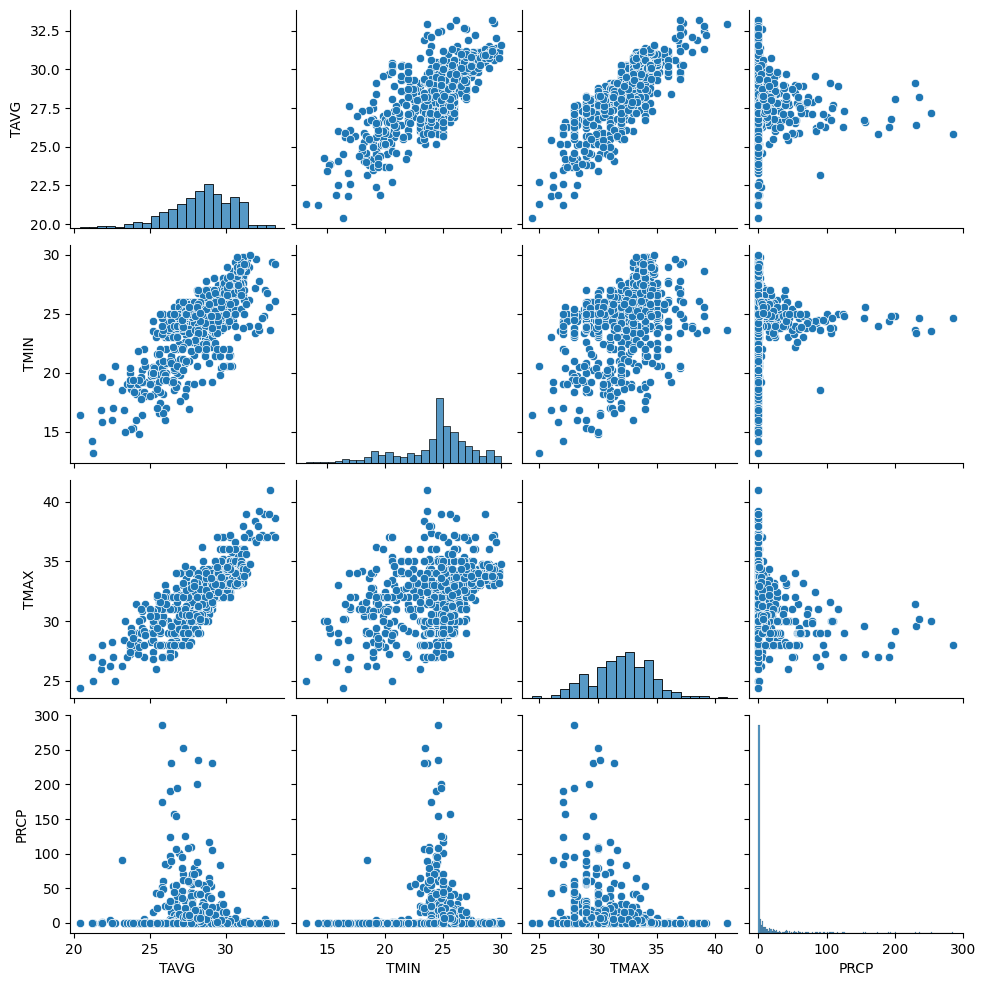

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)  # Pairplot for visualizing relationships between numerical columns
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Assuming 'TAVG' is the column you want to predict
X = df.drop('TAVG', axis=1)
y = df['TAVG']

# Check if non-numeric columns exist before creating dummy variables
non_numeric_cols = X.select_dtypes(include=['object']).columns
if not non_numeric_cols.empty:
    X = pd.get_dummies(X, columns=non_numeric_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()  # Use RandomForestRegressor for regression tasks
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print("Test Data")
print(X_test)
print("Predicted Values")
print(y_pred)

Mean Absolute Error: 0.4526142857142847
Test Data
     TMIN  TMAX  PRCP  DATE_01-01-2022  DATE_01-02-2021  DATE_01-02-2022  \
396  17.0  31.2   0.0                0                0                0   
735  22.2  31.0   0.0                0                0                0   
633  24.8  30.8   0.0                0                0                0   
393  15.2  29.4   0.0                0                0                0   
559  25.0  28.0  55.1                0                0                0   
..    ...   ...   ...              ...              ...              ...   
179  26.2  32.0  26.9                0                0                0   
456  26.8  32.2   0.0                0                0                0   
668  25.6  34.4   0.0                0                0                0   
519  26.4  33.4   3.6                0                0                0   
265  25.0  28.0  23.1                0                0                0   

     DATE_01-03-2021  DATE_01-03-2022